# Project: Creating a Stock Dashboard

## Analyzing Stocks with Python and xlwings

In [2]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data 
import seaborn as sns
from statsmodels.formula.api import ols
plt.style.use("seaborn")

In [ ]:
# note that sometimes you need to redo the "pip install pandas-datareader"

## Set up blank Excel Workbook

In [3]:
wb = xw.Book("Stocks.xlsx")

In [4]:
db_s = wb.sheets[0]
prices_s = wb.sheets[1]
data_s = wb.sheets[2]

In [5]:
symb_test = data_s.range("A1").expand("down").value # here is where I have a list of stock symbols
symb_test

['OLED',
 'WINA',
 'SPY',
 'DIS',
 'MU',
 'SPOT',
 'BYDDF',
 'UTMD',
 'BRK.B',
 'IJS',
 'IJT',
 'TUR']

In [6]:
symbol = db_s.range("C7").value
start = data_s.range("C1").value
end = data_s.range("D1").value
benchmark = data_s.range("B1").value
freq = db_s.range("K39").value 
# this should all be cleaned up to a single input section

In [7]:
print(symbol, start, end, benchmark, freq, sep = "  |  ")

INTU  |  2020-01-01 00:00:00  |  2020-08-31 00:00:00  |  SPY  |  M


In [ ]:
# to build out heatmap, I will need to read in dataframe of all stocks I want; 
# will take time so need to think this through
'''
Things left to do:
1) create a macro button to run in Excel sheet
2) create list of ticker
3) additional information I want in my dashboard
4) simulation of future returns
5) optimal portfolio positions
6) 


'''

In [9]:
df_matrix = data.DataReader(name = symb_test, data_source = "yahoo", start = start, end=end).Close

/Users/fayadabbasi/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [10]:
df_matrix = df_matrix[['BYDDF','DIS','IJS','IJT','MU','OLED','SPOT','SPY','TUR','UTMD','WINA']]
df_matrix.head()
# this gives me the stock prices

Symbols,BYDDF,DIS,IJS,IJT,MU,OLED,SPOT,SPY,TUR,UTMD,WINA
Date,,,,,,,,,,,
2020-01-02,5.08,148.199997,80.375000,96.805000,55.389999,212.889999,151.619995,324.869995,27.650000,106.760002,198.500000
2020-01-03,5.03,146.500000,80.209999,96.824997,54.529999,208.389999,152.500000,322.410004,26.730000,108.519997,198.300003
2020-01-06,5.00,145.649994,80.275002,96.730003,53.570000,211.869995,156.720001,323.640015,26.469999,106.660004,199.000000
2020-01-07,4.94,145.699997,79.605003,96.205002,58.270000,213.210007,156.020004,322.730011,26.650000,104.889999,200.000000
2020-01-08,4.96,145.399994,79.605003,96.839996,57.520000,214.429993,158.779999,324.450012,27.219999,102.690002,204.990005


In [11]:
df_ret = df_matrix.resample(freq).last().dropna().pct_change().dropna()
df_ret.head()
# this gives me the percent change by month and drop the na from first month or if no longer valid

Symbols,BYDDF,DIS,IJS,IJT,MU,OLED,SPOT,SPY,TUR,UTMD,WINA
Date,,,,,,,,,,,
2020-02-29,0.172745,-0.149375,-0.101487,-0.088808,-0.009983,-0.098655,-0.029583,-0.079166,-0.147748,-0.050722,0.005177
2020-03-31,-0.130933,-0.178921,-0.261727,-0.203536,-0.199772,-0.170099,-0.114352,-0.129987,-0.205497,0.076087,-0.362900
2020-04-30,0.156309,0.119565,0.138883,0.123604,0.138611,0.139171,0.248106,0.126984,0.070250,-0.117491,0.177209
2020-05-31,-0.074919,0.084605,0.025479,0.057715,0.000418,-0.023448,0.193706,0.047645,0.074590,0.198554,-0.040867
2020-06-30,0.345070,-0.049361,0.031271,0.036316,0.075350,0.020600,0.427016,0.013275,0.074502,-0.109168,0.190241


In [12]:
df_matrix.corr()
# do a correlation between all the stocks in the matrix - so stock price, not returns

Symbols,BYDDF,DIS,IJS,IJT,MU,OLED,SPOT,SPY,TUR,UTMD,WINA
Symbols,,,,,,,,,,,
BYDDF,1.000000,0.185598,0.078746,0.365168,0.047947,0.223866,0.931527,0.587278,-0.090804,-0.253415,-0.006089
DIS,0.185598,1.000000,0.957911,0.953624,0.806740,0.919760,0.177596,0.868568,0.805149,0.610469,0.756048
IJS,0.078746,0.957911,1.000000,0.943838,0.868966,0.894228,0.042292,0.797895,0.891226,0.642154,0.881142
IJT,0.365168,0.953624,0.943838,1.000000,0.829121,0.894508,0.332430,0.943584,0.783226,0.539891,0.786713
MU,0.047947,0.806740,0.868966,0.829121,1.000000,0.735395,0.016006,0.699399,0.893310,0.647922,0.814425
OLED,0.223866,0.919760,0.894228,0.894508,0.735395,1.000000,0.199277,0.815043,0.714271,0.531909,0.703234
SPOT,0.931527,0.177596,0.042292,0.332430,0.016006,0.199277,1.000000,0.563883,-0.084938,-0.141113,-0.072585
SPY,0.587278,0.868568,0.797895,0.943584,0.699399,0.815043,0.563883,1.000000,0.598184,0.395203,0.606014
TUR,-0.090804,0.805149,0.891226,0.783226,0.893310,0.714271,-0.084938,0.598184,1.000000,0.690430,0.891387


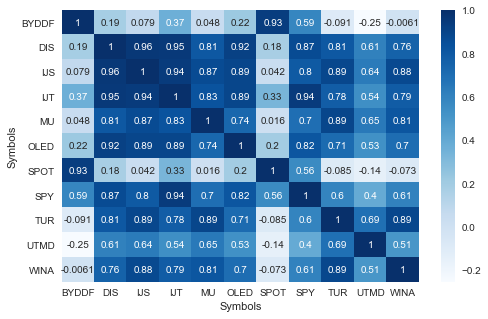

In [13]:
chart4 = plt.figure(figsize = (8, 5))
sns.heatmap(df_matrix.corr(), annot=True, cmap="Blues");

In [14]:
db_s.pictures.add(chart4,name = "Chart4", update = True, 
                   left = db_s.range("C64").left, 
                   top = db_s.range("C64").top, 
                  height = db_s.range("C64").height, 
                  width = db_s.range("C64").width*9)
# places the picture in the spreadsheet

<Picture 'Chart4' in <Sheet [Stocks.xlsx]Dashboard>>

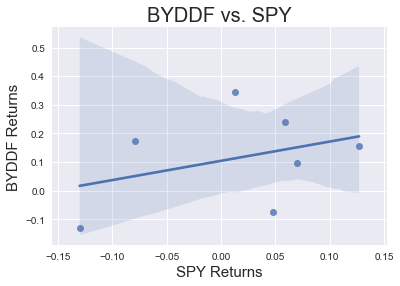

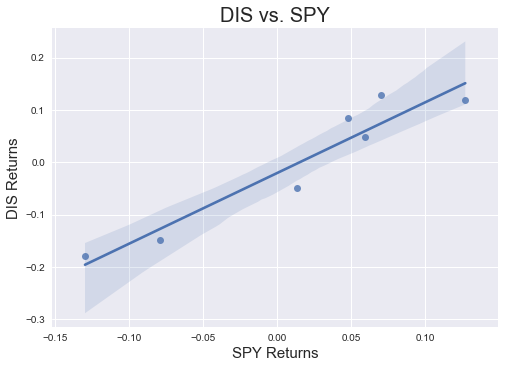

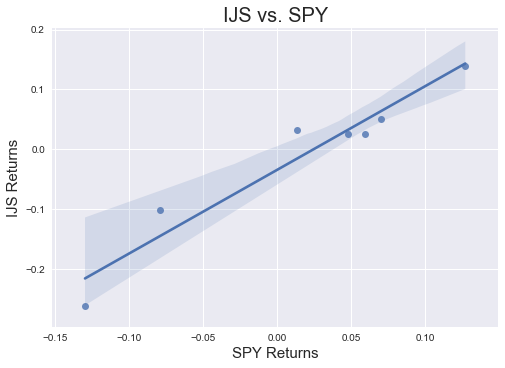

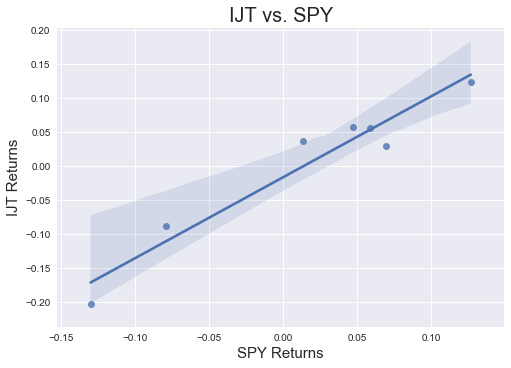

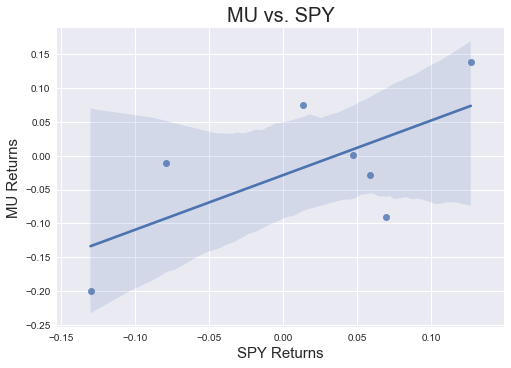

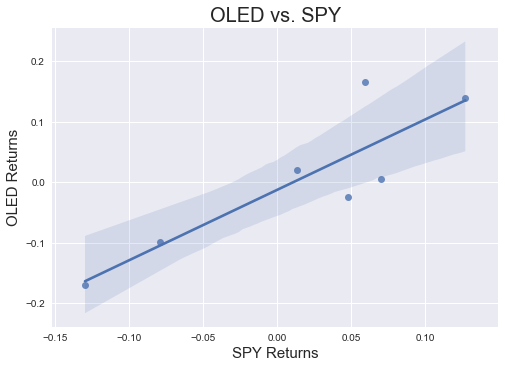

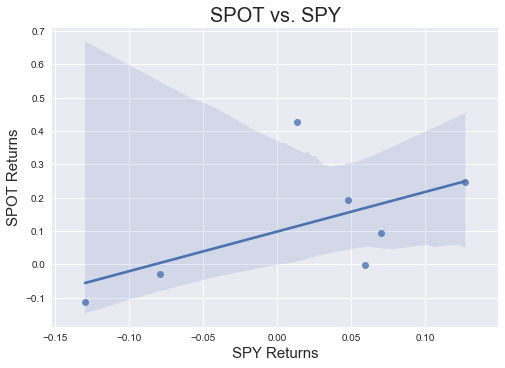

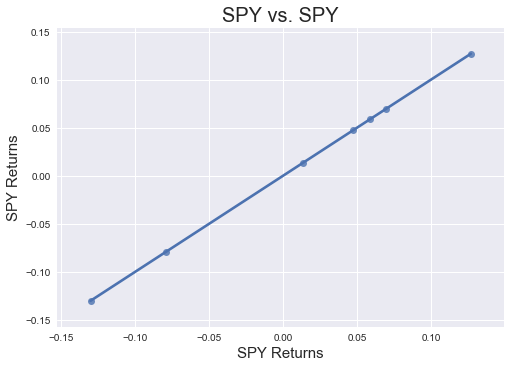

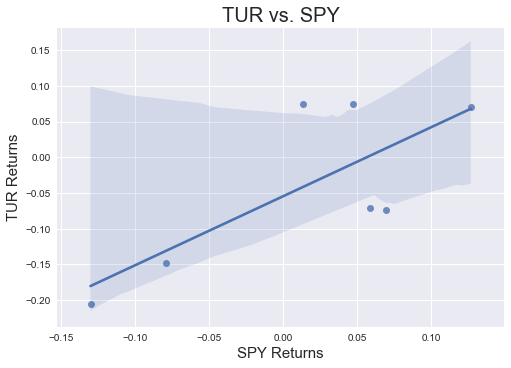

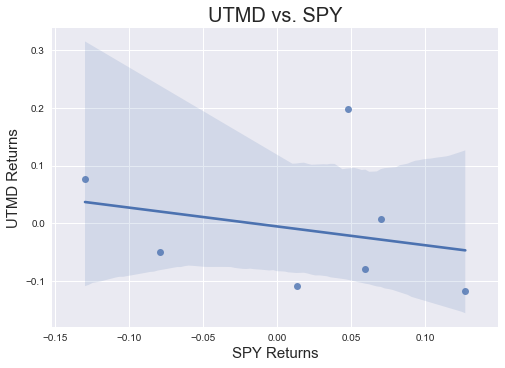

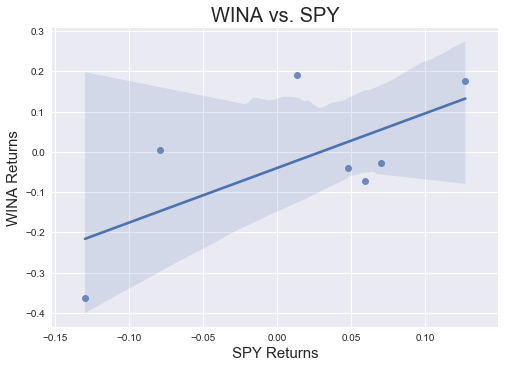

In [33]:
chart5 = plt.figure(figsize = (6, 4))
for items in df_matrix.columns:
    sns.regplot(data = df_ret, x = 'SPY', y = items)
    plt.title(items + " vs. " + 'SPY', fontsize = 20)
    plt.xlabel(benchmark + " Returns", fontsize = 15)
    plt.ylabel(items + " Returns", fontsize = 15)
    plt.show()

In [15]:
df = data.DataReader(name = [symbol, benchmark], data_source = "yahoo", start = start, end = end).Close
df.head()

Symbols,INTU,SPY
Date,,
2020-01-02,266.160004,324.869995
2020-01-03,264.380005,322.410004
2020-01-06,266.410004,323.640015
2020-01-07,266.470001,322.730011
2020-01-08,272.880005,324.450012


In [16]:
df.rename(columns = {benchmark:benchmark.replace("^", "")}, inplace = True)
# this was when I was using ^GSPC as the benchmark; switching to SPY eliminates the need for this

In [17]:
df.head()

Symbols,INTU,SPY
Date,,
2020-01-02,266.160004,324.869995
2020-01-03,264.380005,322.410004
2020-01-06,266.410004,323.640015
2020-01-07,266.470001,322.730011
2020-01-08,272.880005,324.450012


In [18]:
benchmark = benchmark.replace("^", "")
benchmark

'SPY'

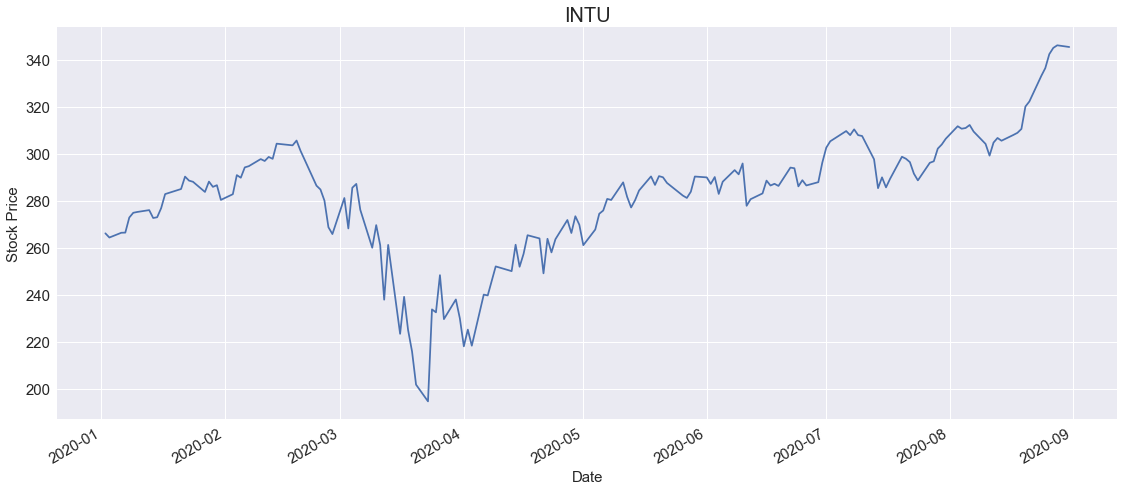

In [19]:
chart = plt.figure(figsize = (19, 8))
df[symbol].plot(fontsize = 15)
plt.title(symbol, fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Stock Price", fontsize = 15)
plt.show()
# I should see about making this an interactive graph where I can adjust timeline

In [371]:
db_s.pictures.add(chart, name = "Chart", update = True, 
                   left = db_s.range("C8").left, 
                   top = db_s.range("C8").top, 
                  height = db_s.range("C8").height, 
                  width = db_s.range("C8").width*9)

<Picture 'Chart' in <Sheet [Stocks.xlsx]Dashboard>>

In [34]:
first = df.iloc[0,0]
first

266.1600036621094

In [35]:
high = df.iloc[:, 0].max()
high

346.1099853515625

In [36]:
low = df.iloc[:, 0].min()
low

194.72000122070312

In [37]:
last = df.iloc[-1, 0]
last

345.3900146484375

In [38]:
total_change = last / first - 1
total_change

0.2976781255492871

In [39]:
db_s.range("H12").options(transpose = True).value = [first, high, low, last, total_change]

In [40]:
first_index = df.iloc[0,1]
high_index = df.iloc[:,1].max()
low_index = df.iloc[:,1].min()
last_index = df.iloc[-1,1]
total_change_index = last_index / first_index - 1
db_s.range("I12").options(transpose = True).value = [first_index, high_index, low_index, last_index, total_change_index]

In [41]:
norm = df.div(df.iloc[0]).mul(100)
norm.head()

Symbols,INTU,SPY
Date,,
2020-01-02,100.000000,100.000000
2020-01-03,99.331230,99.242777
2020-01-06,100.093928,99.621393
2020-01-07,100.116470,99.341280
2020-01-08,102.524798,99.870723


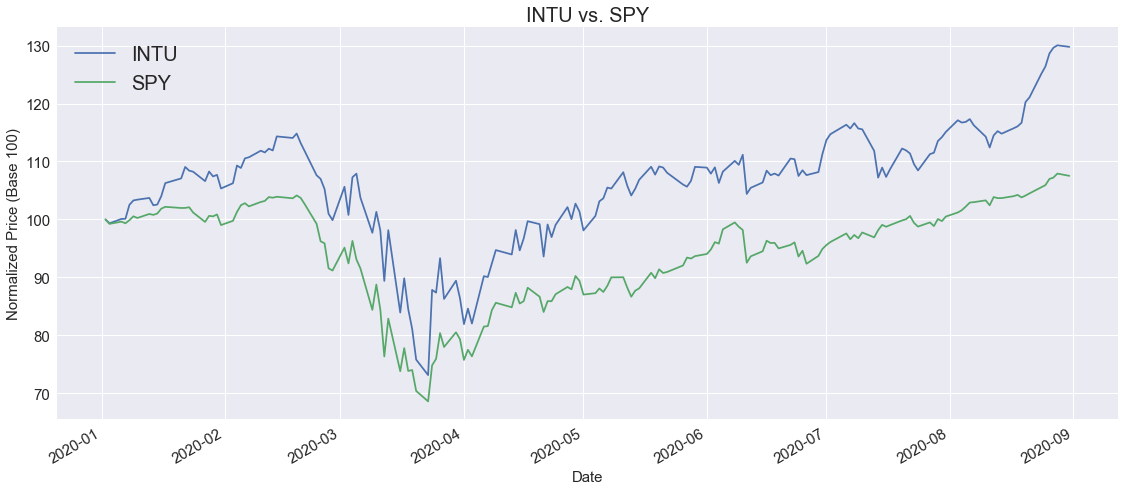

In [42]:
chart2 = plt.figure(figsize = (19, 8))
norm[symbol].plot(fontsize = 15)
norm[benchmark].plot(fontsize = 15)
plt.title(symbol + " vs. " + benchmark, fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Normalized Price (Base 100)", fontsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [43]:
db_s.pictures.add(chart2, name = "Chart2", update = True, 
                   left = db_s.range("C21").left, 
                   top = db_s.range("C21").top + 10,
                 height = db_s.range("C21").height*15,
                 width = db_s.range("C21").width*9)

ShapeAlreadyExists: 

In [44]:
ret  = df.resample(freq).last().dropna().pct_change().dropna()
ret.head()

Symbols,INTU,SPY
Date,,
2020-02-29,-0.051823,-0.079166
2020-03-31,-0.134850,-0.129987
2020-04-30,0.173087,0.126984
2020-05-31,0.076016,0.047645
2020-06-30,0.020219,0.013275


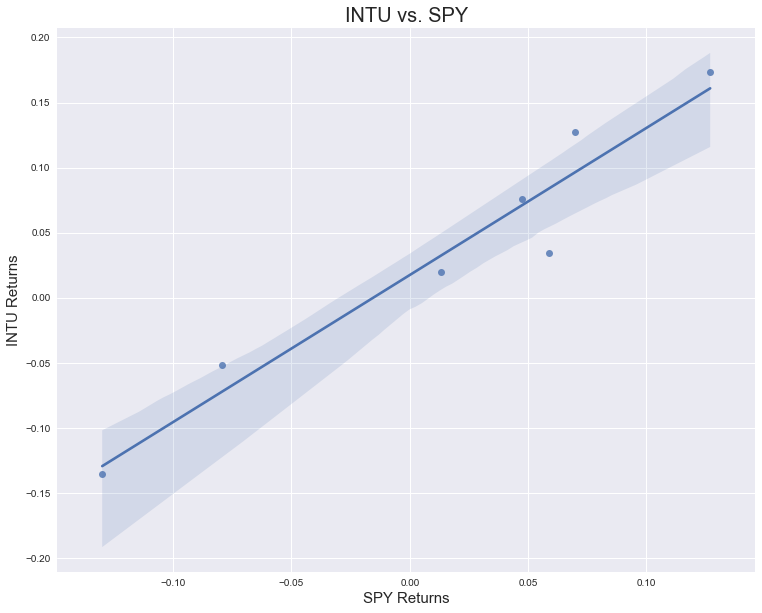

In [45]:
chart3 = plt.figure(figsize = (12.5, 10))
sns.regplot(data = ret, x = benchmark, y = symbol)
plt.title(symbol + " vs. " + benchmark, fontsize = 20)
plt.xlabel(benchmark + " Returns", fontsize = 15)
plt.ylabel(symbol + " Returns", fontsize = 15)
plt.show()

In [384]:
db_s.pictures.add(chart3, name = "Chart3", update = True, 
                   left = db_s.range("C40").left, 
                   top = db_s.range("C40").top,
                 height = db_s.range("C21").height*19,
                 width = db_s.range("C21").width*6)

<Picture 'Chart3' in <Sheet [Stocks.xlsx]Dashboard>>

In [46]:
model = ols(symbol + "~" + benchmark, data = ret)

In [47]:
results = model.fit()

In [48]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   INTU   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     73.76
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           0.000353
Time:                        18:53:54   Log-Likelihood:                 16.047
No. Observations:                   7   AIC:                            -28.09
Df Residuals:                       5   BIC:                            -28.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0176      0.011      1.582      0.1

/Users/fayadabbasi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [49]:
obs = len(ret)
corr_coef = ret.corr().iloc[0,1]
beta = results.params[1]
r_sq = results.rsquared
t_stat = results.tvalues[1]
p_value = results.pvalues[1]
conf_left = results.conf_int().iloc[1,0]
conf_right = results.conf_int().iloc[1,1]
interc = results.params[0]

In [50]:
regr_list = [obs, corr_coef, beta, r_sq, t_stat, p_value, conf_left, conf_right, interc]

In [51]:
regr_list

[7,
 0.9677385664793074,
 1.1288089791565095,
 0.9365179330514254,
 8.588503990235749,
 0.0003528706277223761,
 0.790950853675485,
 1.466667104637534,
 0.01758603585343507]

In [52]:
db_s.range("K41").options(transpose = True).value = regr_list

In [53]:
prices_s.range("A1").expand().clear_contents()
prices_s.range("A1").value = df

## Running with Run main

In [ ]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data 
import seaborn as sns
from statsmodels.formula.api import ols
plt.style.use("seaborn")

In [ ]:
wb = xw.Book("Stocks.xlsx")

In [ ]:
def main():
    
    #connect
    #wb = xw.Book.caller()
    
    #define sheets
    db_s = wb.sheets[0]
    prices_s = wb.sheets[1]
    
    #read values
    symbol = db_s.range("C7").value
    start = db_s.range("F7").value
    end = db_s.range("I7").value
    benchmark = db_s.range("K20").value
    freq = db_s.range("K39").value
    
    #load stock data and create df
    df = data.DataReader(name = [symbol, benchmark], data_source = "yahoo",
                         start = start, end = end).Close
    df.rename(columns = {benchmark:benchmark.replace("^", "")}, inplace = True)
    
    benchmark = benchmark.replace("^", "")
    
    #create chart 
    chart = plt.figure(figsize = (19, 8))
    df[symbol].plot(fontsize = 15)
    plt.title(symbol, fontsize = 20)
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel("Stock Price", fontsize = 15)
    db_s.pictures.add(chart, name = "Chart", update = True, 
                      left = db_s.range("C8").left, 
                      top = db_s.range("C8").top,
                      scale = 0.47)
    
    #calculate and write metrics
    first = df.iloc[0,0]
    high = df.iloc[:, 0].max()
    low = df.iloc[:, 0].min()
    last = df.iloc[-1, 0]
    total_change = last / first - 1
    db_s.range("H12").options(transpose = True).value = [first, high, low, last, total_change]
    
    #create chart2
    norm = df.div(df.iloc[0]).mul(100)
    chart2 = plt.figure(figsize = (19, 8))
    norm[symbol].plot(fontsize = 15)
    norm[benchmark].plot(fontsize = 15)
    plt.title(symbol + " vs. " + benchmark, fontsize = 20)
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel("Normalized Price (Base 100)", fontsize = 15)
    plt.legend(fontsize = 20)
    db_s.pictures.add(chart2, name = "Chart2", update = True, 
                      left = db_s.range("C21").left, 
                      top = db_s.range("C21").top + 10,
                      scale = 0.46)
    
    #calculate returns
    ret  = df.resample(freq).last().dropna().pct_change().dropna()
   
    #create chart3
    chart3 = plt.figure(figsize = (12.5, 10))
    sns.regplot(data = ret, x = benchmark, y = symbol)
    plt.title(symbol + " vs. " + benchmark, fontsize = 20)
    plt.xlabel(benchmark + " Returns", fontsize = 15)
    plt.ylabel(symbol + " Returns", fontsize = 15)
    db_s.pictures.add(chart3, name = "Chart3", update = True, 
                      left = db_s.range("C40").left, 
                      top = db_s.range("C40").top,
                      scale = 0.47)
    
    #Linear Regression
    model = ols(symbol + "~" + benchmark, data = ret)
    results = model.fit()
    
    #calculate & write Regression Statistics
    obs = len(ret)
    corr_coef = ret.corr().iloc[0,1]
    beta = results.params[1]
    r_sq = results.rsquared
    t_stat = results.tvalues[1]
    p_value = results.pvalues[1]
    conf_left = results.conf_int().iloc[1,0]
    conf_right = results.conf_int().iloc[1,1]
    interc = results.params[0]
    
    regr_list = [obs, corr_coef, beta, r_sq, t_stat, 
                 p_value, conf_left, conf_right, interc]
    db_s.range("K41").options(transpose = True).value = regr_list
    
    #write raw data
    prices_s.range("A1").expand().clear_contents()
    prices_s.range("A1").value = df

In [ ]:
main()